In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
from sklearn.metrics import confusion_matrix,plot_confusion_matrix

# import scikit learn
import sklearn

from sklearn import datasets
# --------------------------------------
from sklearn import preprocessing
# --------------------------------------
from sklearn.model_selection import train_test_split
# --------------------------------------
from sklearn.preprocessing import LabelEncoder
# --------------------------------------
from sklearn.decomposition import PCA
# --------------------------------------
from sklearn.model_selection import GridSearchCV 
# --------------------------------------
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
# --------------------------------------
import warnings

import numpy as np
# --------------------------------------
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
# --------------------------------------
# show several outputs in one cell. 
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
# --------------------------------------
warnings.simplefilter("ignore")
%matplotlib inline

import pandas as pd
import numpy as np


from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, GridSearchCV 


from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn import preprocessing
from sklearn import metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import silhouette_score

from sklearn.datasets import fetch_20newsgroups
from sklearn import datasets

from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline

# linear regression
from sklearn import linear_model
from sklearn.svm import LinearSVC
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier

from sklearn.decomposition import PCA

from sklearn.cluster import KMeans

import warnings
warnings.simplefilter("ignore")
%matplotlib inline

# show several prints in one cell. This will allow us to condence every trick in one cell.
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"



In [2]:
#data crawling all films
list_of_ganers =["sci-fi","comedy","Action","Adventure","Drama","Fantasy","Family","Romance","Crime","Sport","Mystery","Musical"]
rating=[]
rating2=[]
runtimes=[]
ganers=[]
years=[]
for_childs=[]
votes=[]
names=[]
links = []
gross=[]

for ganer_in_list in list_of_ganers:
    i=1
    url = "https://www.imdb.com/search/title/?title_type=movie&genres="+ganer_in_list+"&start="+str(i)+"&explore=title_type,genres&ref_=adv_nxt"
    page = requests.get(url)
    while (page.status_code == 200):
        if(i>=501):
            print("*")
            break

        url ="https://www.imdb.com/search/title/?title_type=movie&genres="+ganer_in_list+"&start="+str(i)+"&explore=title_type,genres&ref_=adv_nxt"
        page = requests.get(url)
        soup = BeautifulSoup(page.content, "html.parser")
        x = soup.find("div", class_="lister list detail sub-list")
        job_elements = x.find_all("div", class_="lister-item mode-advanced")
        i = i+50
        for job_element in job_elements:
            
            
            yearsfind=job_element.find("span",class_="lister-item-year text-muted unbold")
            if yearsfind:
                strippedText = str(yearsfind.get_text()).replace('(','').replace(')','').replace('I','').replace('V',"").replace('X',"")
                if(strippedText!=""):
                    yv=int(strippedText)
                    years.append(yv)
                    
                else:
                      years.append(None)
            else:
                 years.append(None)

            
            
            nameso= job_element.find("h3",class_="lister-item-header")
            nameso2 =nameso.find("a")
            link=nameso2.get('href')
            names.append(nameso2.get_text())

            for_childe=job_element.find("span",class_="certificate")
            if for_childe:
                for_childs.append(for_childe.get_text())
            else:
                for_childs.append(None)


            ratingo=job_element.find("div",class_="inline-block ratings-imdb-rating")
            if(ratingo):
                ratingo2222=ratingo.find("strong")
                rating.append(float(ratingo2222.get_text()))
            else:
                rating.append(None)

            ratingo2=job_element.find("div",class_="inline-block ratings-metascore")
            if ratingo2:
                ratingo21=ratingo2.find("span",class_="metascore favorable")
                if(ratingo21):
                    rating2.append(int(ratingo21.get_text()))
                else:
                    ratingo212=ratingo2.find("span",class_="metascore mixed")
                    if(ratingo212):
                        rating2.append(int(ratingo212.get_text()))
                    else:
                        ratingo213=ratingo2.find("span",class_="metascore unfavorable")
                        if(ratingo213):
                            rating2.append(int(ratingo213.get_text()))
                        else:
                            rating2.append(None)
            else:
                rating2.append(None)
                                   
            runtime=job_element.find("span",class_="runtime")
            if runtime:
                runtimes.append(runtime.get_text()[0:3])
            else:
                runtimes.append(None)

            ganere=job_element.find("span",class_="genre")
            if ganere:
                ganers.append(ganere.get_text()[1:])
            else:
                ganers.append(None)
            

            vote=job_element.find_all("p",class_="sort-num_votes-visible")
            if(vote):
                vote2=vote[0].find_all("span")
                if vote2:
                    vote3=vote2[1]
                    if len(vote2)==5:
                        gross.append(int(vote2[4].get('data-value').replace(",", "").replace(".", "")))
                    else:
                        gross.append(None)
                    if vote3:
                        xu = vote3.get_text().replace(",", "")
                        votes.append(int(xu))
                    else:
                        votes.append(None)
                else:
                     votes.append(None)
            else:
                votes.append(None)


df1 = pd.DataFrame(list(zip( names,rating,rating2,runtimes,ganers,for_childs,votes,years,gross)),
               columns =['name','imdb_score','Metascore','runtime','ganer','film_ratings','votes',"year","gross"])   

print(df1)







*
*
*
*
*
*
*
*
*
*
*
*
                                             name  imdb_score  Metascore  \
0     Doctor Strange in the Multiverse of Madness         7.4       60.0   
1                        Avatar: The Way of Water         NaN        NaN   
2               Everything Everywhere All at Once         8.7       81.0   
3                                     Firestarter         4.6       32.0   
4                                  Doctor Strange         7.5       72.0   
...                                           ...         ...        ...   
5661                                   Thumbelina         6.2        NaN   
5662                     Bedknobs and Broomsticks         7.0       59.0   
5663                               Guys and Dolls         7.1       77.0   
5664                    My Little Pony: The Movie         6.0       39.0   
5665                             An American Tail         6.9       38.0   

     runtime                                     ganer film_rat

In [3]:
 df1.isna().sum()

name               0
imdb_score       314
Metascore        694
runtime          256
ganer              0
film_ratings    1359
votes            314
year              44
gross           1278
dtype: int64

In [4]:
#data crawling all nominees 
listo =[]
winner_or_loser=[]
rating=[]
gross=[]
rating2=[]
runtimes=[]
names=[]
ganers=[]
for_childs=[]
votes=[]
votes=[]
years=[]
i=1
url = "https://www.imdb.com/list/ls009487211/?sort=list_order,asc&st_dt=&mode=detail&page=" + str(i)
while (i<6):
    i = i+1
    page = requests.get(url)
    if page.status_code != 200:
        break
    url = "https://www.imdb.com/list/ls009487211/?sort=list_order,asc&st_dt=&mode=detail&page=" + str(i)
    soup = BeautifulSoup(page.content, "html.parser")
    job_elements = soup.find_all("div", class_="lister-item mode-detail")
    for job_element in job_elements:
        bla = job_element.find_all("a")
        listo.append(bla[1].get_text())
        winner_or_loser.append(1)
        for_childe=job_element.find("span",class_="certificate")
        if for_childe:
            for_childs.append(for_childe.get_text())
        else:
            for_childs.append(None)
        yearsfind=job_element.find("span",class_="lister-item-year text-muted unbold")
        if yearsfind:
                strippedText = str(yearsfind.get_text()).replace('(','').replace(')','').replace('I','').replace('V',"").replace('X',"")
                if(strippedText!=""):
                    years.append(int(strippedText))
                else:
                    years.append(None)
        else:
                 years.append(None)

        ratingo=job_element.find("span",class_="ipl-rating-star__rating")
        rating.append(float(ratingo.get_text()))

        ratingo2=job_element.find("div",class_="inline-block ratings-metascore")
        if ratingo2:
            ratingo21=ratingo2.find("span")
            rating2.append(int(ratingo21.get_text()))
        else:
            rating2.append(None)

        runtime=job_element.find("span",class_="runtime")
        if runtime:
            runtimes.append(runtime.get_text()[0:3])
        else:
            runtimes.append(None)
            #print(type(runtime))
        ganere=job_element.find("span",class_="genre")
        if ganere:
            ganers.append(ganere.get_text()[1:])
        else:
            ganers.append(None)
        nameso= job_element.find("h3",class_="lister-item-header")
        nameso2 =nameso.find("a")
        names.append(nameso2.get_text())

        vote=job_element.find_all("p",class_="text-muted text-small")
        vote2=vote[2].find_all("span")
        if len(vote2)==5:
            gross.append(int(vote2[4].get('data-value').replace(",", "").replace(".", "")))
        else:
            gross.append(None)
        vote3=vote2[1]
        if vote3:
            xu = vote3.get_text().replace(",", "")
            votes.append(xu)
        else:
            votes.append(None)



df_nominee= pd.DataFrame(list(zip( names,rating,rating2,runtimes,ganers,for_childs,votes,years,gross,winner_or_loser)),
               columns =['name','imdb_score','Metascore','runtime','ganer','film_ratings','votes',"year","gross",'nominee']) 

df_nominee

,name,imdb_score,Metascore,runtime,ganer,film_ratings,votes,year,gross,nominee
0,Nomadland,7.3,93.0,107,Drama,R,151227,2020,NaN,1
1,The Father,8.3,88.0,97,"Drama, Mystery",PG-13,135649,2020,NaN,1
2,Judas and the Black Messiah,7.4,85.0,126,"Biography, Drama, History",R,73663,2021,NaN,1
3,Mank,6.8,79.0,131,"Biography, Comedy, Drama",R,71604,2020,NaN,1
4,Minari,7.4,89.0,115,Drama,PG-13,75082,2020,NaN,1
...,...,...,...,...,...,...,...,...,...,...
475,Ninotchka,7.8,NaN,110,"Comedy, Romance",None,20898,1939,1187000.0,1
476,Of Mice and Men,7.9,89.0,106,"Adventure, Drama",None,6021,1939,NaN,1
477,Stagecoach,7.8,93.0,96,"Adventure, Drama, Western",None,48243,1939,NaN,1
478,The Wizard of Oz,8.1,92.0,102,"Adventure, Family, Fantasy",PG,390276,1939,2076020.0,1


In [5]:
#data merging
df1['nominee'] = 0
df2 = pd.concat([df1, df_nominee], axis=0, join="inner",ignore_index=True)

print(df2['nominee'].value_counts())
df2



0    5666
1     480
Name: nominee, dtype: int64


,name,imdb_score,Metascore,runtime,ganer,film_ratings,votes,year,gross,nominee
0,Doctor Strange in the Multiverse of Madness,7.4,60.0,126,"Action, Adventure, Fantasy",PG-13,156530.0,2022.0,NaN,0
1,Avatar: The Way of Water,NaN,NaN,None,"Action, Adventure, Sci-Fi",None,NaN,2022.0,NaN,0
2,Everything Everywhere All at Once,8.7,81.0,139,"Action, Adventure, Comedy",R,51786.0,2022.0,NaN,0
3,Firestarter,4.6,32.0,94,"Drama, Horror, Sci-Fi",R,6235.0,2022.0,232641920.0,0
4,Doctor Strange,7.5,72.0,115,"Action, Adventure, Fantasy",PG-13,703300.0,2016.0,NaN,0
...,...,...,...,...,...,...,...,...,...,...
6141,Ninotchka,7.8,NaN,110,"Comedy, Romance",None,20898,1939.0,1187000.0,1
6142,Of Mice and Men,7.9,89.0,106,"Adventure, Drama",None,6021,1939.0,NaN,1
6143,Stagecoach,7.8,93.0,96,"Adventure, Drama, Western",None,48243,1939.0,NaN,1
6144,The Wizard of Oz,8.1,92.0,102,"Adventure, Family, Fantasy",PG,390276,1939.0,2076020.0,1


In [6]:
df2.dtypes

name             object
imdb_score      float64
Metascore       float64
runtime          object
ganer            object
film_ratings     object
votes            object
year            float64
gross           float64
nominee           int64
dtype: object

In [7]:
df2.duplicated(subset='name', keep='first').sum()


2801

In [8]:
def remove_duplicatives(df, col_name=None):
    if(col_name==None):
        return df.drop_duplicates(keep='last').copy()
    else:
        return df.drop_duplicates(col_name,keep='last').copy()

In [9]:
df3=remove_duplicatives(df2,"name")
df3
print(df3['nominee'].value_counts())



,name,imdb_score,Metascore,runtime,ganer,film_ratings,votes,year,gross,nominee
56,Nope,NaN,NaN,None,"Horror, Sci-Fi",None,NaN,2022.0,30925690.0,0
59,Alien,8.5,89.0,117,"Horror, Sci-Fi",16,854297.0,1979.0,56117548.0,0
173,Alien: Covenant,6.4,65.0,122,"Horror, Sci-Fi, Thriller",R,274989.0,2017.0,38119483.0,0
192,Last Survivors,4.7,NaN,98,"Sci-Fi, Thriller",None,1434.0,2021.0,NaN,0
193,Event Horizon,6.6,35.0,96,"Horror, Sci-Fi, Thriller",R,174649.0,1997.0,330360194.0,0
...,...,...,...,...,...,...,...,...,...,...
6141,Ninotchka,7.8,NaN,110,"Comedy, Romance",None,20898,1939.0,1187000.0,1
6142,Of Mice and Men,7.9,89.0,106,"Adventure, Drama",None,6021,1939.0,NaN,1
6143,Stagecoach,7.8,93.0,96,"Adventure, Drama, Western",None,48243,1939.0,NaN,1
6144,The Wizard of Oz,8.1,92.0,102,"Adventure, Family, Fantasy",PG,390276,1939.0,2076020.0,1


0    2866
1     479
Name: nominee, dtype: int64


In [10]:
 df3.isna().sum()

name              0
imdb_score      133
Metascore       509
runtime         108
ganer             0
film_ratings    994
votes           133
year             24
gross           806
nominee           0
dtype: int64

In [11]:
#### removing rows of year 2022 (no nominees from this year yet)
#df4 = df3[df3.year < 2022]
df4 = df3[df3.year < 2022]
df4


,name,imdb_score,Metascore,runtime,ganer,film_ratings,votes,year,gross,nominee
59,Alien,8.5,89.0,117,"Horror, Sci-Fi",16,854297.0,1979.0,56117548.0,0
173,Alien: Covenant,6.4,65.0,122,"Horror, Sci-Fi, Thriller",R,274989.0,2017.0,38119483.0,0
192,Last Survivors,4.7,NaN,98,"Sci-Fi, Thriller",None,1434.0,2021.0,NaN,0
193,Event Horizon,6.6,35.0,96,"Horror, Sci-Fi, Thriller",R,174649.0,1997.0,330360194.0,0
194,Life,6.6,54.0,104,"Horror, Sci-Fi, Thriller",R,225241.0,2017.0,40456565.0,0
...,...,...,...,...,...,...,...,...,...,...
6141,Ninotchka,7.8,NaN,110,"Comedy, Romance",None,20898,1939.0,1187000.0,1
6142,Of Mice and Men,7.9,89.0,106,"Adventure, Drama",None,6021,1939.0,NaN,1
6143,Stagecoach,7.8,93.0,96,"Adventure, Drama, Western",None,48243,1939.0,NaN,1
6144,The Wizard of Oz,8.1,92.0,102,"Adventure, Family, Fantasy",PG,390276,1939.0,2076020.0,1


In [12]:
 df4.isna().sum()

name              0
imdb_score        0
Metascore       324
runtime           0
ganer             0
film_ratings    827
votes             0
year              0
gross           747
nominee           0
dtype: int64

In [13]:
#missing values handling
df4['Metascore'] = df4['Metascore'].fillna(0)
df4['film_ratings'] = df4['film_ratings'].fillna("Unrated")
df4['gross'] = df4['gross'].fillna(df4.gross.mean())


df4

,name,imdb_score,Metascore,runtime,ganer,film_ratings,votes,year,gross,nominee
59,Alien,8.5,89.0,117,"Horror, Sci-Fi",16,854297.0,1979.0,5.611755e+07,0
173,Alien: Covenant,6.4,65.0,122,"Horror, Sci-Fi, Thriller",R,274989.0,2017.0,3.811948e+07,0
192,Last Survivors,4.7,0.0,98,"Sci-Fi, Thriller",Unrated,1434.0,2021.0,7.449743e+07,0
193,Event Horizon,6.6,35.0,96,"Horror, Sci-Fi, Thriller",R,174649.0,1997.0,3.303602e+08,0
194,Life,6.6,54.0,104,"Horror, Sci-Fi, Thriller",R,225241.0,2017.0,4.045656e+07,0
...,...,...,...,...,...,...,...,...,...,...
6141,Ninotchka,7.8,0.0,110,"Comedy, Romance",Unrated,20898,1939.0,1.187000e+06,1
6142,Of Mice and Men,7.9,89.0,106,"Adventure, Drama",Unrated,6021,1939.0,7.449743e+07,1
6143,Stagecoach,7.8,93.0,96,"Adventure, Drama, Western",Unrated,48243,1939.0,7.449743e+07,1
6144,The Wizard of Oz,8.1,92.0,102,"Adventure, Family, Fantasy",PG,390276,1939.0,2.076020e+06,1


In [14]:
 df4.isna().sum()

name            0
imdb_score      0
Metascore       0
runtime         0
ganer           0
film_ratings    0
votes           0
year            0
gross           0
nominee         0
dtype: int64

In [15]:
def remove_corrupt_rows(df, num_max_missing_cols):
    return df.dropna( thresh=df.columns.size-num_max_missing_cols).copy()

In [16]:
df5=remove_corrupt_rows(df4,0)
df5


,name,imdb_score,Metascore,runtime,ganer,film_ratings,votes,year,gross,nominee
59,Alien,8.5,89.0,117,"Horror, Sci-Fi",16,854297.0,1979.0,5.611755e+07,0
173,Alien: Covenant,6.4,65.0,122,"Horror, Sci-Fi, Thriller",R,274989.0,2017.0,3.811948e+07,0
192,Last Survivors,4.7,0.0,98,"Sci-Fi, Thriller",Unrated,1434.0,2021.0,7.449743e+07,0
193,Event Horizon,6.6,35.0,96,"Horror, Sci-Fi, Thriller",R,174649.0,1997.0,3.303602e+08,0
194,Life,6.6,54.0,104,"Horror, Sci-Fi, Thriller",R,225241.0,2017.0,4.045656e+07,0
...,...,...,...,...,...,...,...,...,...,...
6141,Ninotchka,7.8,0.0,110,"Comedy, Romance",Unrated,20898,1939.0,1.187000e+06,1
6142,Of Mice and Men,7.9,89.0,106,"Adventure, Drama",Unrated,6021,1939.0,7.449743e+07,1
6143,Stagecoach,7.8,93.0,96,"Adventure, Drama, Western",Unrated,48243,1939.0,7.449743e+07,1
6144,The Wizard of Oz,8.1,92.0,102,"Adventure, Family, Fantasy",PG,390276,1939.0,2.076020e+06,1


In [17]:
 df5.isna().sum()

name            0
imdb_score      0
Metascore       0
runtime         0
ganer           0
film_ratings    0
votes           0
year            0
gross           0
nominee         0
dtype: int64

R            901
Unrated      827
PG-13        753
PG           488
16            49
G             34
18            21
NC-17          4
Not Rated      2
X              2
Approved       1
M/PG           1
Name: film_ratings, dtype: int64


<AxesSubplot:ylabel='film_ratings'>

(-1.1052129159537962, 1.100248234093038, -1.130705053719214, 1.112866774172373)

Text(0.5, 1.0, 'number of apperances in dataframe')

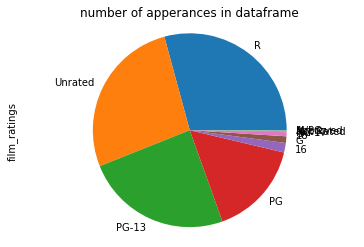

In [18]:
#from string to numaric film_rating column
#EDA
print(df5.film_ratings.value_counts())
df5.film_ratings.value_counts().plot(kind='pie')
plt.axis('equal')
plt.title('number of apperances in dataframe')

In [20]:
#from string to numaric film_rating column



df5.loc[df5["film_ratings"] == "Approved","film_ratings"] = int(0)
df5.loc[df5["film_ratings"] == "GP","film_ratings"] = int(2)
df5.loc[df5["film_ratings"] == "M","film_ratings"] = int(2)
df5.loc[df5["film_ratings"] == "M/PG","film_ratings"] = int(2)
df5.loc[df5["film_ratings"] == "Not Rated","film_ratings"] = int(0)
df5.loc[df5["film_ratings"] == "Unrated","film_ratings"] = int(0)
df5.loc[df5["film_ratings"] == "G","film_ratings"] = int(1)
df5.loc[df5["film_ratings"] == "PG","film_ratings"] = int(2)
df5.loc[df5["film_ratings"] == "PG-13","film_ratings"] = int(3)
df5.loc[df5["film_ratings"] == "R","film_ratings"] = int(4)
df5.loc[df5["film_ratings"] == 16,"film_ratings"] = int(5)
df5.loc[df5["film_ratings"] == "NC-17","film_ratings"] = int(6)
df5.loc[df5["film_ratings"] == "X","film_ratings"] = int(6)
df5.loc[df5["film_ratings"] == 18,"film_ratings"] = int(6)
df5.loc[df5["film_ratings"] == "TV-14","film_ratings"] = int(4)

     

print(df5)


                   name  imdb_score  Metascore runtime  \
59                Alien         8.5       89.0     117   
173     Alien: Covenant         6.4       65.0     122   
192      Last Survivors         4.7        0.0     98    
193       Event Horizon         6.6       35.0     96    
194                Life         6.6       54.0     104   
...                 ...         ...        ...     ...   
6141          Ninotchka         7.8        0.0     110   
6142    Of Mice and Men         7.9       89.0     106   
6143         Stagecoach         7.8       93.0     96    
6144   The Wizard of Oz         8.1       92.0     102   
6145  Wuthering Heights         7.5        0.0     104   

                                       ganer film_ratings     votes    year  \
59                Horror, Sci-Fi                       16  854297.0  1979.0   
173     Horror, Sci-Fi, Thriller                        4  274989.0  2017.0   
192             Sci-Fi, Thriller                        0    1434.

In [21]:
print(df5.ganer.value_counts())


Animation, Adventure, Comedy                 133
Drama, Romance                               117
Action, Adventure, Sci-Fi                    108
Comedy, Drama, Romance                       107
Drama                                         73
                                            ... 
Documentary, Biography, Crime                  1
Documentary, Drama, Sport                      1
Action, Sport                                  1
Documentary, Adventure, Drama                  1
Drama, History, Romance                        1
Name: ganer, Length: 322, dtype: int64


In [22]:
#ganers vectorizer  
sample=df5["ganer"]
vectorizer = CountVectorizer()
X_g = vectorizer.fit_transform(sample)
kpok=pd.DataFrame(X_g.toarray(),columns=vectorizer.get_feature_names(),index=df5.index.values.tolist())  
result = pd.concat([df5, kpok], axis=1, join="inner")
print(result)

                   name  imdb_score  Metascore runtime  \
59                Alien         8.5       89.0     117   
173     Alien: Covenant         6.4       65.0     122   
192      Last Survivors         4.7        0.0     98    
193       Event Horizon         6.6       35.0     96    
194                Life         6.6       54.0     104   
...                 ...         ...        ...     ...   
6141          Ninotchka         7.8        0.0     110   
6142    Of Mice and Men         7.9       89.0     106   
6143         Stagecoach         7.8       93.0     96    
6144   The Wizard of Oz         8.1       92.0     102   
6145  Wuthering Heights         7.5        0.0     104   

                                       ganer film_ratings     votes    year  \
59                Horror, Sci-Fi                       16  854297.0  1979.0   
173     Horror, Sci-Fi, Thriller                        4  274989.0  2017.0   
192             Sci-Fi, Thriller                        0    1434.

In [23]:
#ganers vectorizer  
df6=result.drop("ganer",axis=1)
#remove movies names
df7=df6.drop("name",axis=1)



In [24]:
df7

,imdb_score,Metascore,runtime,film_ratings,votes,year,gross,nominee,action,adventure,...,music,musical,mystery,noir,romance,sci,sport,thriller,war,western
59,8.5,89.0,117,16,854297.0,1979.0,5.611755e+07,0,0,0,...,0,0,0,0,0,1,0,0,0,0
173,6.4,65.0,122,4,274989.0,2017.0,3.811948e+07,0,0,0,...,0,0,0,0,0,1,0,1,0,0
192,4.7,0.0,98,0,1434.0,2021.0,7.449743e+07,0,0,0,...,0,0,0,0,0,1,0,1,0,0
193,6.6,35.0,96,4,174649.0,1997.0,3.303602e+08,0,0,0,...,0,0,0,0,0,1,0,1,0,0
194,6.6,54.0,104,4,225241.0,2017.0,4.045656e+07,0,0,0,...,0,0,0,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6141,7.8,0.0,110,0,20898,1939.0,1.187000e+06,1,0,0,...,0,0,0,0,1,0,0,0,0,0
6142,7.9,89.0,106,0,6021,1939.0,7.449743e+07,1,0,1,...,0,0,0,0,0,0,0,0,0,0
6143,7.8,93.0,96,0,48243,1939.0,7.449743e+07,1,0,1,...,0,0,0,0,0,0,0,0,0,1
6144,8.1,92.0,102,2,390276,1939.0,2.076020e+06,1,0,1,...,0,0,0,0,0,0,0,0,0,0


<AxesSubplot:xlabel='nominee', ylabel='count'>

Text(0.5, 1.0, 'Count of nominees')

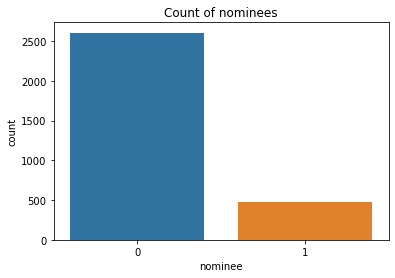

In [79]:
fig , ax = plt.subplots(figsize=(6,4))
sns.countplot(x='nominee', data=df7)
plt.title("Count of nominees")
plt.show()

In [81]:
n=len(df7)
nom_0=len(df7[df7['nominee']==0])
nom_1=len(df7[df7['nominee']==1])

print("% of movie be a nominee in train dataset: ",nom_1*100/n)
print("% of movie not be a nominee   in train dataset: ",nom_0*100/n)

% of movie be a nominee in train dataset:  15.536814790788194
% of movie not be a nominee   in train dataset:  84.4631852092118


In [84]:
corr_df=df5 #New dataframe to calculate correlation between numeric features
cor= corr_df.corr(method='pearson')
print(cor)

            imdb_score  Metascore      year     gross   nominee
imdb_score    1.000000   0.523165 -0.276842  0.029693  0.378879
Metascore     0.523165   1.000000  0.042433  0.066179  0.187198
year         -0.276842   0.042433  1.000000  0.087971 -0.453710
gross         0.029693   0.066179  0.087971  1.000000  0.004728
nominee       0.378879   0.187198 -0.453710  0.004728  1.000000


Text(0.5, 1.0, 'Correlation Plot')

<AxesSubplot:title={'center':'Correlation Plot'}>

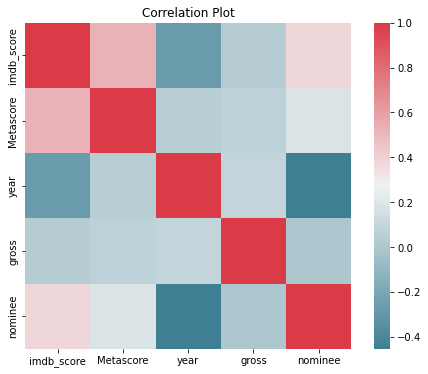

In [85]:
fig, ax =plt.subplots(figsize=(8, 6))
plt.title("Correlation Plot")
sns.heatmap(cor, mask=np.zeros_like(cor, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)
plt.show()

<AxesSubplot:xlabel='nominee', ylabel='count'>

(0.0, 500.0)

Text(0.5, 1.0, 'Impact of film_ratings on nominee')

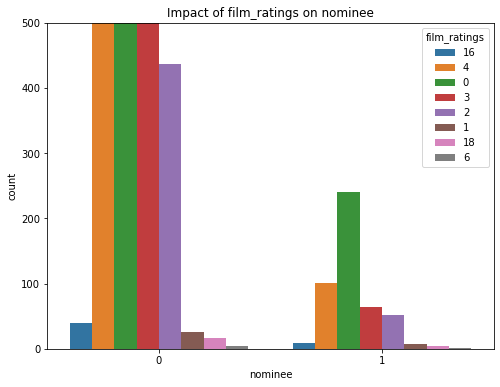

In [86]:
fig, ax=plt.subplots(figsize=(8,6))
sns.countplot(x='nominee', data=df7, hue='film_ratings')
ax.set_ylim(0,500)
plt.title("Impact of film_ratings on nominee")
plt.show()

<AxesSubplot:title={'center':'the conection betwen imdb rating to votes'}, xlabel='imdb_score', ylabel='votes'>

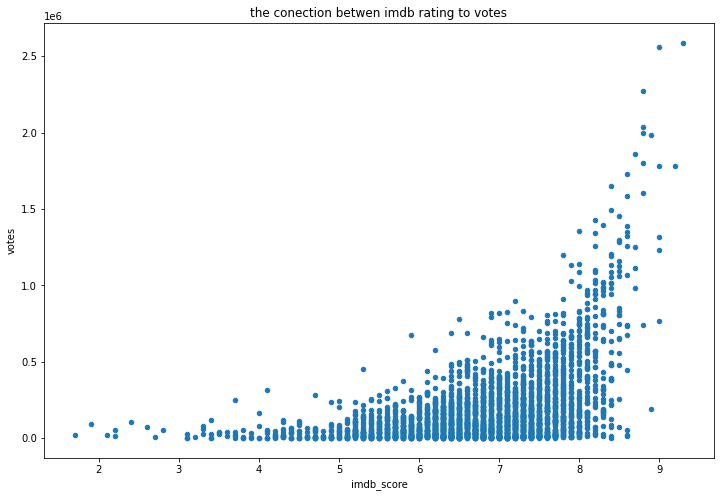

In [25]:
#ויזואליזציה
df7.plot.scatter('imdb_score', 'votes',  
                        figsize=(12,8), title = "the conection betwen imdb rating to votes")


<AxesSubplot:title={'center':'the conection betwen Metascore  to nominee'}, xlabel='Metascore', ylabel='nominee'>

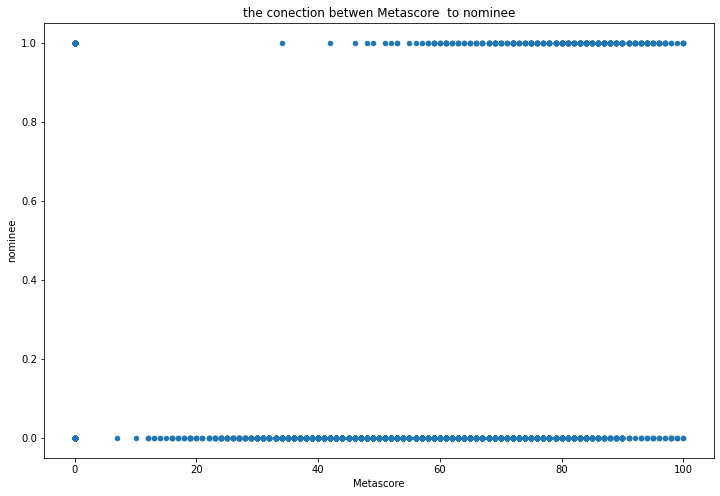

In [26]:
#ויזואליזציה
df7.plot.scatter('Metascore', 'nominee',  
                        figsize=(12,8), title = "the conection betwen Metascore  to nominee")


<AxesSubplot:title={'center':'the conection betwen imdb score and nominees'}, xlabel='imdb_score', ylabel='nominee'>

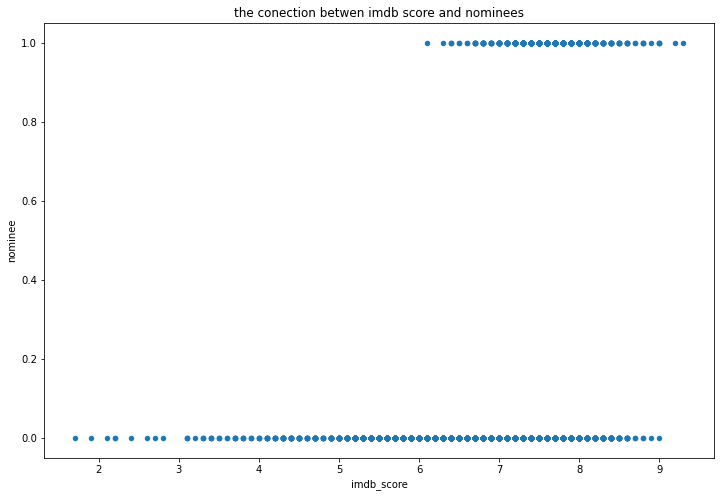

In [27]:
#ויזואליזציה
df7.plot.scatter('imdb_score', 'nominee',  
                        figsize=(12,8), title = "the conection betwen imdb score and nominees")
#we can see the all the nominees movies get betwen 6-9 imdb score

In [28]:
#pre machine learning
target_column = 'nominee'
y = df7[target_column]
X = df7.drop([target_column],axis=1)


In [29]:
X.dtypes


imdb_score      float64
Metascore       float64
runtime          object
film_ratings     object
votes            object
year            float64
gross           float64
action            int64
adventure         int64
animation         int64
biography         int64
comedy            int64
crime             int64
documentary       int64
drama             int64
family            int64
fantasy           int64
fi                int64
film              int64
history           int64
horror            int64
music             int64
musical           int64
mystery           int64
noir              int64
romance           int64
sci               int64
sport             int64
thriller          int64
war               int64
western           int64
dtype: object

In [30]:
#pre machine learning
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)


In [31]:
#scaling
scaler = preprocessing.StandardScaler()
print(X_train)
X_train_scaled = scaler.fit_transform(X_train)
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns, index=X_train.index)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns, index=X_test.index)

      imdb_score  Metascore runtime film_ratings     votes    year  \
3755         7.5       82.0     111            4  122871.0  1995.0   
4529         6.1       41.0     90             3  161250.0  1998.0   
4325         6.4       32.0     97             0   55420.0  1989.0   
6071         7.6       82.0     154            0     16833  1948.0   
5981         7.7       72.0     120            1     34283  1966.0   
...          ...        ...     ...          ...       ...     ...   
4550         6.2       28.0     95             0   36122.0  1981.0   
3734         7.1       76.0     105            4    3230.0  2021.0   
3798         7.4       90.0     130            4  128913.0  2017.0   
4046         6.9       68.0     123            4  178882.0  2015.0   
3371         6.8       46.0     120            2  345124.0  1992.0   

             gross  action  adventure  animation  ...  music  musical  \
3755  2.254934e+07       0          0          0  ...      0        0   
4529  5.99897

In [42]:
param_grid = { 
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}
from sklearn.ensemble import RandomForestClassifier


In [43]:
rfc=RandomForestClassifier(random_state=42)

In [68]:
CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5,scoring='f1_macro')
CV_rfc.fit(X_train_scaled, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 5, 6, 7, 8],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [200, 500]},
             scoring='f1_macro')

In [69]:
CV_rfc.best_params_


{'criterion': 'entropy',
 'max_depth': 8,
 'max_features': 'auto',
 'n_estimators': 200}

In [70]:
grid=RandomForestClassifier(random_state=42, max_features='auto', n_estimators= 200, max_depth=8, criterion='entropy')

In [71]:
grid.fit(X_train_scaled, y_train)

RandomForestClassifier(criterion='entropy', max_depth=8, n_estimators=200,
                       random_state=42)

In [72]:
#best f1 score
f1s = CV_rfc.best_score_ *100
print("f1 macro for our training dataset with tuning is : {:.2f}%".format(f1s))

f1 macro for our training dataset with tuning is : 82.48%


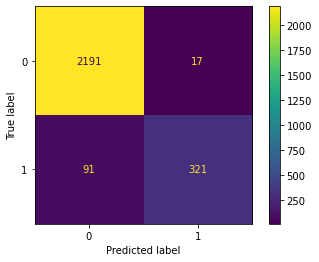

In [73]:
#confusion_matrix on train set
plot_confusion_matrix(grid,X_train_scaled, y_train,values_format='d' )


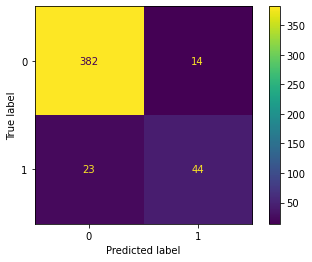

In [74]:
#confusion_matrix on test set
plot_confusion_matrix(grid,X_test_scaled, y_test,values_format='d' )


In [75]:
#create y_pred
y_pred=grid.predict(X_test_scaled)
print(y_pred)

print(metrics.confusion_matrix(y_true = y_test, y_pred = y_pred))
print('Accuracy = ', metrics.accuracy_score(y_true = y_test, y_pred = y_pred))

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0
 0 0 0 0 1 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0
 0 0 0 0 0 1 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0
 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 1 0 0 0 0 0 0 0 1 1 1 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0
 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0
 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 0 0 0 0 0 1 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 1 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 1 1 0 0 0 0 0 1 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0]
[[382  14]
 [ 23  44]]
Accuracy =  0.9200863930885529


In [76]:
#X_test_scaled predicted y
grid.predict(X_test_scaled)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,

In [77]:
#f1 scores
from sklearn.metrics import f1_score


print("f1 1: ", f1_score(y_test, y_pred,pos_label=1))
print("f1 0: ", f1_score(y_test, y_pred,pos_label=0))
print("f1: ",f1_score(y_test, y_pred, average='macro'))

f1 1:  0.7040000000000001
f1 0:  0.9538077403245943
f1:  0.8289038701622972
